# Увеличение выручки интернет-магазина

В этом проекте - анализ крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки. 

**Цель исследования** - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**Ход исследования**

Исследование пройдет в 5 этапов:

1. Обзор данных;
2. Предобработка данных;
3. Приоритизация гипотез;
4. Анализ A/B-теста;
5. Вывод.

## Шаг 1. Обзор данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


Читаем файлы `hypothesis.csv`, `orders.csv` и `visitors.csv`. Сохраняем их в переменные `hypothesis`, `orders`, `visitors` соответственно.

In [2]:
try: 
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # гипотезы
    pd.read_csv('/datasets/orders.csv'),  # заказы 
    pd.read_csv('/datasets/visitors.csv'),  # пользователи   
    )
except: 
    hypothesis, orders, visitors = (
    pd.read_csv('hypothesis.csv'),  # гипотезы
    pd.read_csv('orders.csv'),  # заказы 
    pd.read_csv('visitors.csv'),  # пользователи
)

Выводим на экран первые 10 строк таблицы `hypothesis.csv`, а также общую информацию о таблице:

In [3]:
pd.options.display.max_colwidth = 100
display(hypothesis.head(10))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице 5 столбцов. Согласно документации к данным:
* `Hypothesis` - краткое описание гипотезы;
* `Reach` - охват пользователей по 10-балльной шкале;
* `Impact` - влияние на пользователей по 10-балльной шкале;
* `Confidence` - уверенность в гипотезе по 10-балльной шкале;
* `Efforts`  - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение, тем дороже проверка гипотезы.

В данных замечена ошибка: нарушение стиля в названиях колонок.

Выводим на экран первые 10 строк таблицы `orders.csv`, а также общую информацию о таблице:

In [5]:
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


В таблице 5 столбцов. Согласно документации к данным:
* `transactionId` - идентификатор заказа;
* `visitorId` - идентификатор пользователя, совершившего заказ;
* `date` - дата, когда был совершён заказ;
* `revenue` - выручка заказа;
* `group`  - группа A/B-теста, в которую попал заказ.

В данных замечены следующие ошибки: 
1. Нарушение стиля в названиях колонок;
2. Неправильный тип данных в столбце `date`.

Выводим на экран первые 10 строк таблицы `visitors.csv`, а также общую информацию о таблице:

In [7]:
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [8]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице 3 столбца. Согласно документации к данным:
* `date` - дата;
* `group` - группа A/B-теста;
* `visitors` - количество пользователей в указанную дату в указанной группе A/B-теста

В данных замечена ошибка: неправильный тип данных в столбце `date`.

## Шаг 2.  Предобработка данных

### 2.1 Стиль заголовков

In [9]:
orders.columns #выводим названия столбцов датафрейма orders

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [10]:
orders = orders.rename( #для таблицы orders
    columns={
        'transactionId': 'transaction_id',
        'visitorId': 'visitor_id',
    }
)
hypothesis.columns = hypothesis.columns.str.lower() #для таблицы hypothesis

### 2.2 Изменение типов данных 

Поменяем типы данных в столбцах `date` таблиц `orders` и `visitors` на тип `datetime`:

In [11]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

### 2.3 Дубликаты

Для качества анализа данные необходимо проверить на дубликаты. Сначала займемся явными дубликатами.

In [12]:
hypothesis.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
visitors.duplicated().sum()

0

Данные таблицы проверять на наличие неявных дубликатов смысла нет, так как значения столбцов не несут названий.

**Вывод**


На этапе предобработки были исправлены следующие ошибки:
* стили заголовков;
* неверные типы данных.

Теперь можно приступить к следующему шагу.

## Шаг 3. Приоритизация гипотез

Сначала применим фреймворк `ICE` для приоритизации гипотез.

In [15]:
hypothesis['ICE']  = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспектвные гипотезы по ICE: 8, 0, 7, 6. Теперь применим фреймворк `RICE` для приоритизации гипотез.

In [16]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспектвные гипотезы по RICE: 8, 0, 7, 2. Шестую гипотезу сменила вторая, так произошло, потому что ее параметр `Reach` больше, следовательно, она затронет больше пользователей.

**Вывод** После применения фреймворков ICE и RICE можно выделить наиболее перспективные гипотезы: 8, 0, 7, 2, 6.

## Шаг 4. Анализ A/B-теста

Для начала соберем все кумулятивные данные.

In [17]:

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitor_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

print(cumulativeData.head(5))


        date group  orders  revenue  visitors
0 2019-08-01     A      20   148579       719
1 2019-08-01     B      20   101217       713
2 2019-08-02     A      38   242401      1338
3 2019-08-02     B      43   266748      1294
4 2019-08-03     A      62   354874      1845


In [18]:
min(cumulativeData['date'])

Timestamp('2019-08-01 00:00:00')

In [19]:
max(cumulativeData['date'])

Timestamp('2019-08-31 00:00:00')

In [20]:
cumulativeData['date']  = pd.to_datetime(cumulativeData['date']).dt.date

Построим графики кумулятивной выручки по группам.

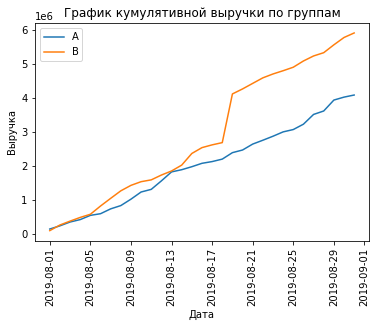

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Сегмент В лидирует весь тест. В его данных замечен резкий скачок, скорее всего на это влияют аномально большие заказы. При заключительнои анализе их нужно будет удалить.

Построим график кумулятивного среднего чека по группам. 

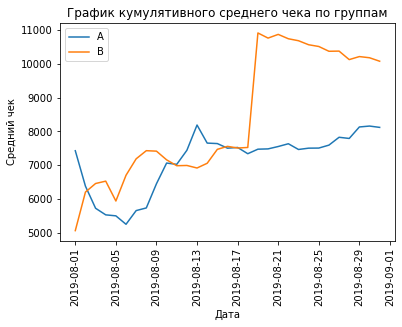

In [22]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Кумулятивное значение среднего чека по сегментам продолжает колебаться. Принимать решение по этой метрике рано, требуется дополнительный анализ выбросов, которые искажают результаты.

Далее построим график относительного изменения кумулятивного среднего чека группы B к группе A.

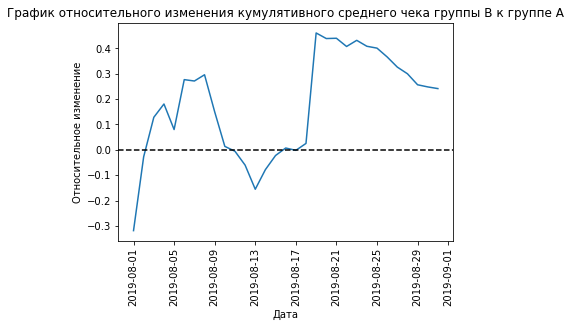

In [23]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation = 90)
plt.show()

Результаты теста значительно и резко менялись в несколько дат. Видимо, именно тогда были совершены аномальные заказы.

Построим график кумулятивной конверсии по группам.

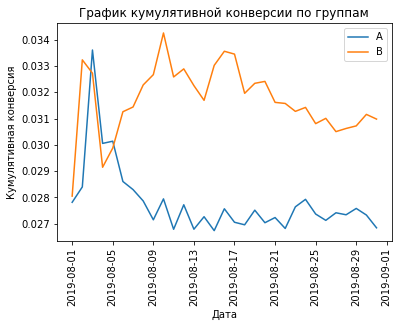

In [24]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная конверсия')
plt.xticks(rotation = 90)
plt.legend()
plt.show()


В начале теста сегмент В имел большую конверсию, но чуть позже лидировал сегмент А. После затухания обеих сегментов, большую конверсию имел сегмент В до окончания теста.

Построим график относительного изменения кумулятивной конверсии группы B к группе A.

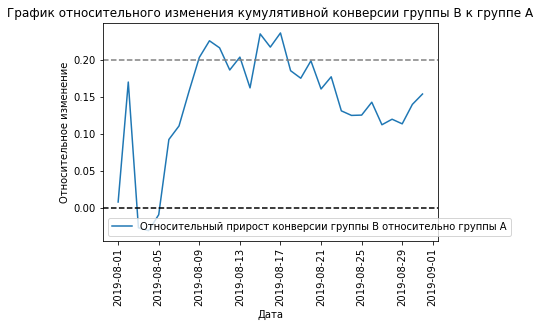

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

Почти с самого начала теста группа В лидирует по конверсии, а позже убывает.

Построим точечный график количества заказов по пользователям.

            orders
visitor_id        
4256040402      11
2458001652      11
2378935119       9
2038680547       8
199603092        5
3062433592       5
237748145        5
3803269165       5
1230306981       5
3717692402       5


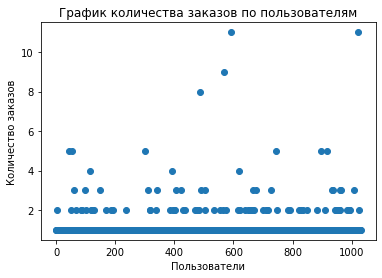

In [26]:
ordersByUsers = (
    orders.groupby('visitor_id')
    .agg({'visitor_id': 'count'})
)
ordersByUsers.columns = ['orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Большинство пользователей совершили всего 1 заказ. Пользователей, заказавших более двух раз, совсем мало. Они вполне могут быть аномальными.

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [27]:
np.percentile(ordersByUsers['orders'], [90, 95, 99])

array([1., 2., 4.])

Не более 5% пользователей совершали больше двух заказов. И не более 1% пользователей - больше 4 заказов. Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Построим точечный график стоимостей заказов. 

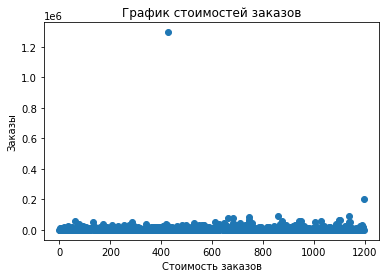

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))

x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Стоимость заказов')
plt.ylabel('Заказы')
plt.show()

Заказов стоимостью 150 000 рублей не очень много. Есть выбросы в районе 200 000 и 1 200 000. Эти заказы выглядят аномально.

Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [29]:
np.percentile(orders['revenue'], [90, 95, 99])

array([18168. , 28000. , 58233.2])

Не более, чем у 5% заказов чек дороже 28 000. И не больше, чем у 1% заказов - дороже 58 233. За  нижнюю границу выберем 28  000, по ней отсеим аномальные заказы.

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.
Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA=(
    orders[orders['group']=='A']
    .groupby('visitor_id',as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsersA.columns=['visitor_id','orders']
ordersByUsersB=(
    orders[orders['group']=='B']
    .groupby('visitor_id',as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
ordersByUsersB.columns=['visitor_id','orders']
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))


0.01679
0.138


Вывод: По «сырым» данным различия в конверсии групп A и B есть.
Первое число — p-value = 0.01679 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный прирост конверсии группы В к конверсии группы А равен 13.8%

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [31]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами всего 2.6%

Приступаем к подготовке очищенных от аномалий данных. Посчитайем статистическую значимость различия конверсии после удаления аномальных пользователей

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.01304
0.173


Как и в случае с сырыми данными, статистическая значиость достигнута. Сегмент В значительно лучше сегмента А.

Посчитаем статистическую значимость различия средних чеков после удаления аномальных пользователей.

In [33]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Как и в случае с сырыми данными, статистическая значиость не достигнута. Впрочем, средний чек группы B стал значительно ниже среднего чека группы A.

**Вывод** 
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
* По сырым данным нет статистически значимого различия по среднему чеку между группами, так  же и после фильтраци
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Хотя покупатели и не стали делать более дорогих покупок, но само их число увеличилось. Значит и прибыль магазина стала выше. Исходя из этого, тест можно остановить  и признать победу группы В.

## Общий вывод

В исследовании стояли следующие задачи: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Работа была разделена на 5 шагов: обзор данных; предобработка данных; приоритизация гипотез; анализ A/B-теста; вывод.

На этапе предобработки данных были исправлены стили заголовков  и неверные типы данных.

В первой части задания стояла цель приоритизации гипотез. После применения фреймворков ICE и RICE были выделены наиболее перспективные гипотезы: 8, 0, 7, 2, 6, а именно: 
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек

Во второй части задания был запущен A/B-тест и сформированы следующие выводы:
* Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
* По сырым данным нет статистически значимого различия по среднему чеку между группами, так  же и после фильтраци
* График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.
* График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.
Хотя покупатели и не стали делать более дорогих покупок, но само их число увеличилось. Значит и прибыль магазина стала выше. Исходя из этого, тест можно остановить  и признать победу группы В.
